In [1]:
# Install required libraries
!pip install seaborn wordcloud matplotlib pandas --quiet

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

# Upload dataset
from google.colab import files
uploaded = files.upload()

# Read CSV (adjust filename if needed)
df = pd.read_csv("Ifood_new.csv")

# Display first few rows
df.head()

Saving Ifood_new.csv to Ifood_new.csv


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,img_url
0,Adhirasam,"Rice flour, jaggery, ghee, vegetable oil, elachi",vegetarian,10,50,sweet,dessert,West Bengal,East,https://www.crazymasalafood.com/wp-content/ima...
1,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
2,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
3,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...
4,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,https://www.vegrecipesofindia.com/wp-content/u...


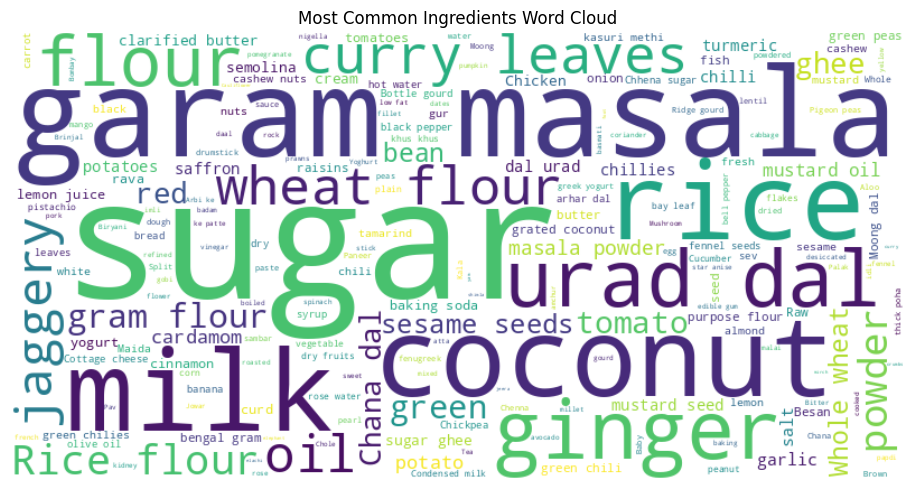

In [2]:
#Word Cloud _ most common Ingredients

text = ' '.join(df['ingredients'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Ingredients Word Cloud")
plt.tight_layout()
plt.show()

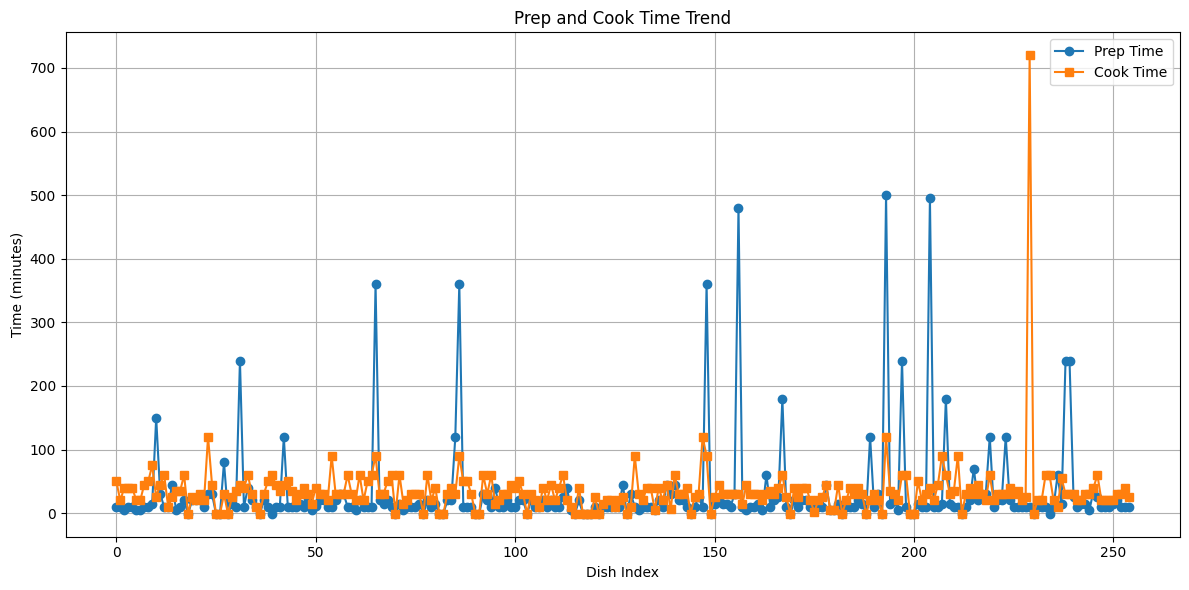

In [3]:
# Line plot _ prep & cook time by dish index

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['prep_time'], label='Prep Time', marker='o')
plt.plot(df.index, df['cook_time'], label='Cook Time', marker='s')
plt.title('Prep and Cook Time Trend')
plt.xlabel('Dish Index')
plt.ylabel('Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

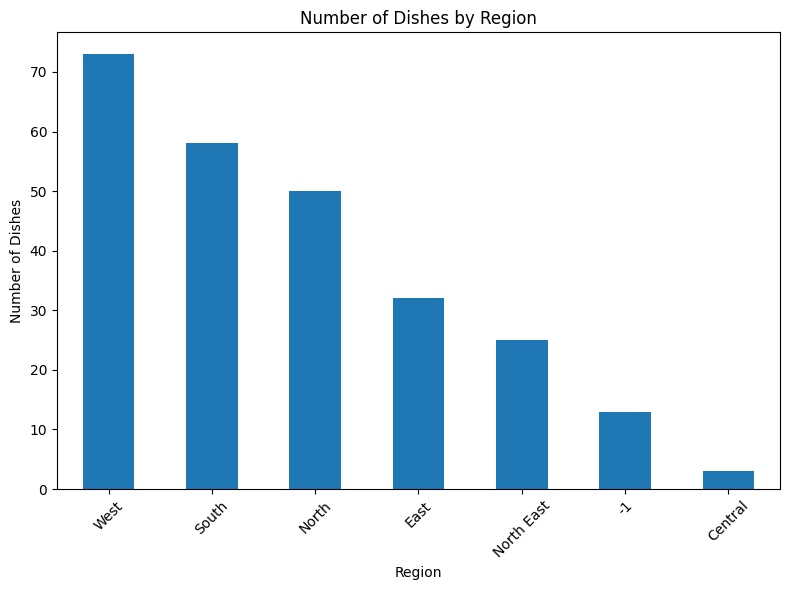

In [4]:
# Bar chart - dishes by region

plt.figure(figsize=(8, 6))
df['region'].value_counts().plot(kind='bar')
plt.title('Number of Dishes by Region')
plt.xlabel('Region')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

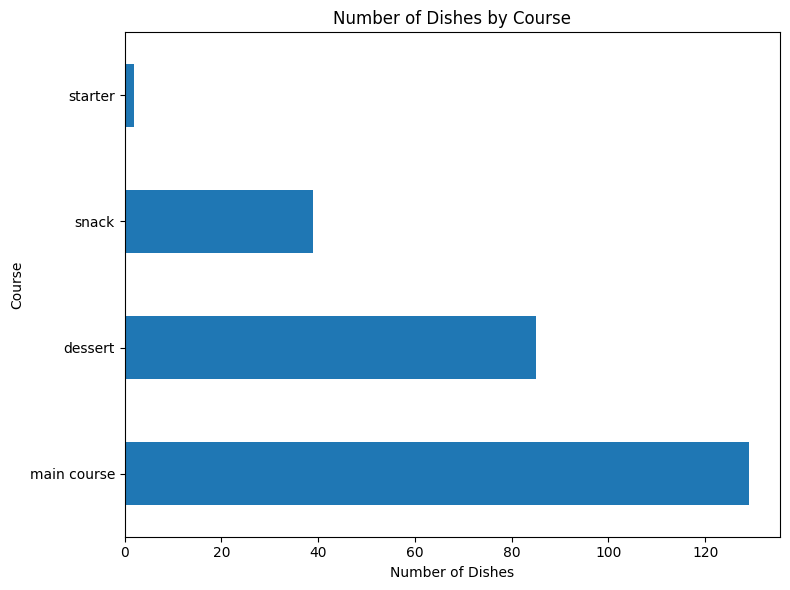

In [5]:
# Horizontal bar chart - dishes by course

plt.figure(figsize=(8, 6))
df['course'].value_counts().plot(kind='barh')
plt.title('Number of Dishes by Course')
plt.xlabel('Number of Dishes')
plt.ylabel('Course')
plt.tight_layout()
plt.show()

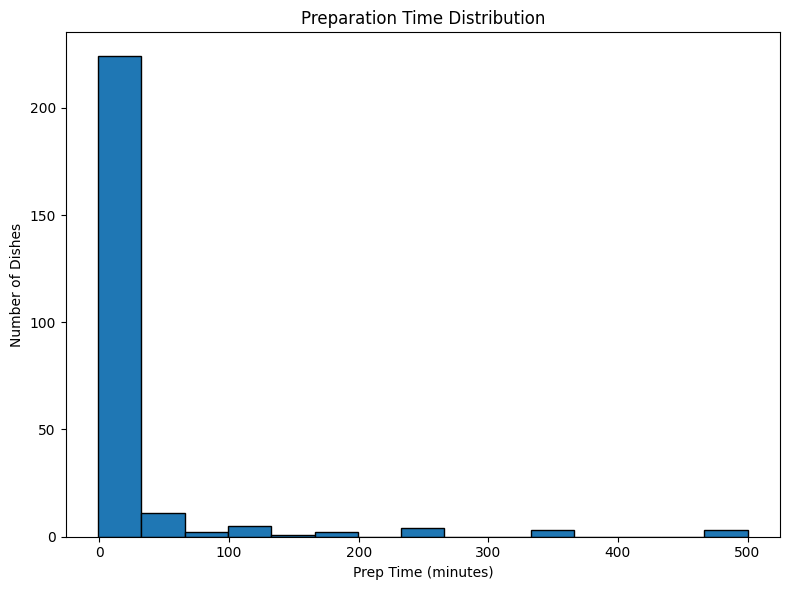

In [6]:
# Histogram - prep time distribution

plt.figure(figsize=(8, 6))
df['prep_time'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Preparation Time Distribution')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Number of Dishes')
plt.tight_layout()
plt.show()

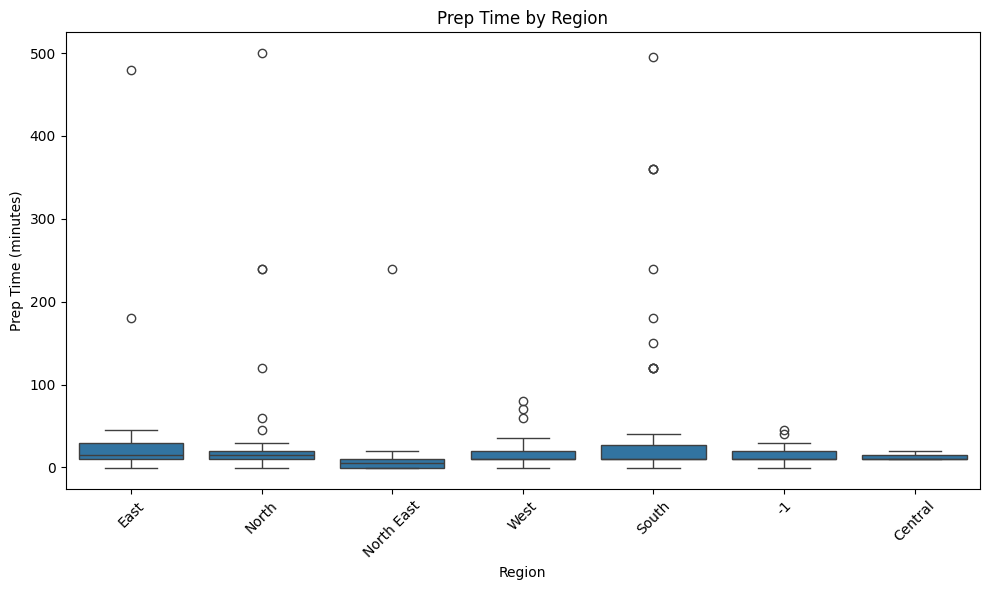

In [7]:
# Box plot - prep time by region

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='prep_time')
plt.title('Prep Time by Region')
plt.xlabel('Region')
plt.ylabel('Prep Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

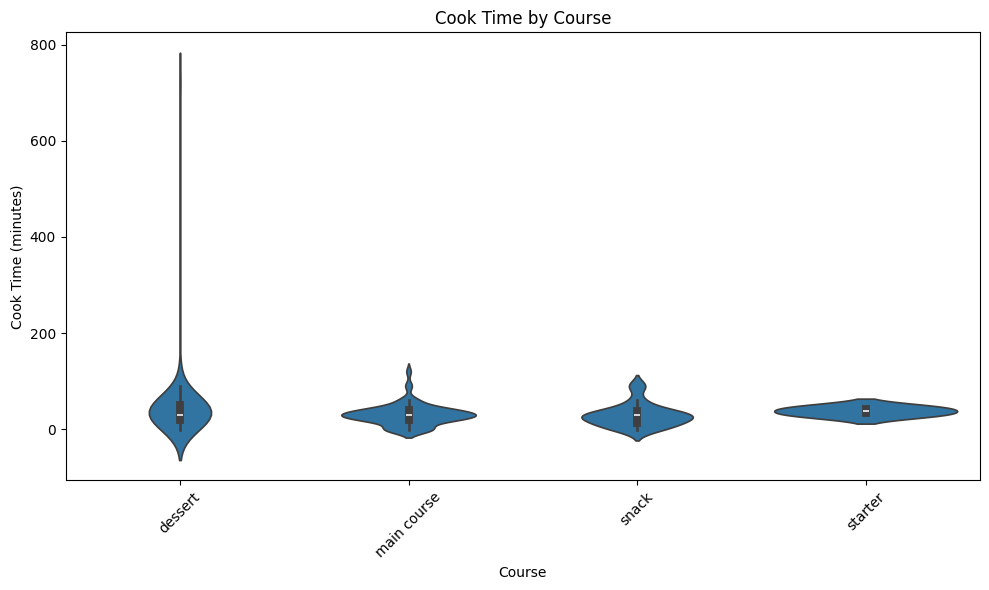

In [8]:
# Violin plot - cook time by course

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='course', y='cook_time')
plt.title('Cook Time by Course')
plt.xlabel('Course')
plt.ylabel('Cook Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

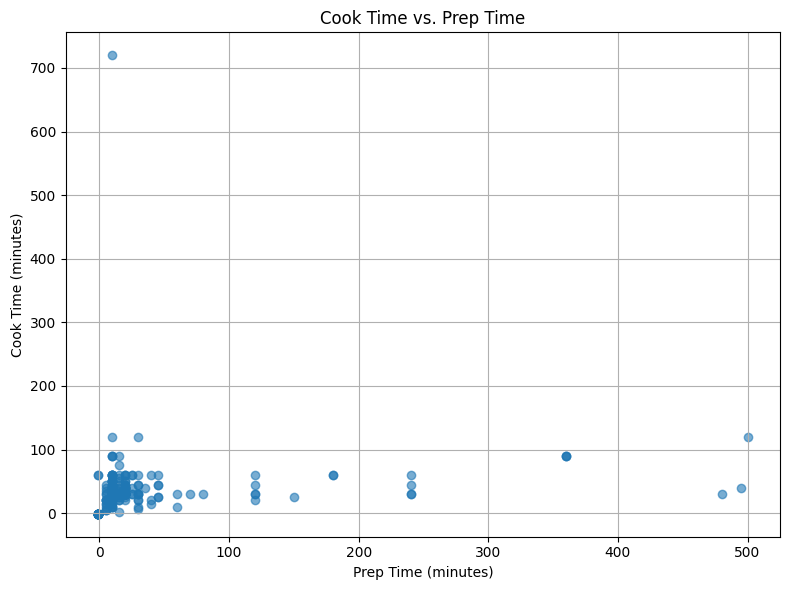

In [9]:
# scatter plot - cook time vs prep time

plt.figure(figsize=(8, 6))
plt.scatter(df['prep_time'], df['cook_time'], alpha=0.6)
plt.title('Cook Time vs. Prep Time')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Cook Time (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

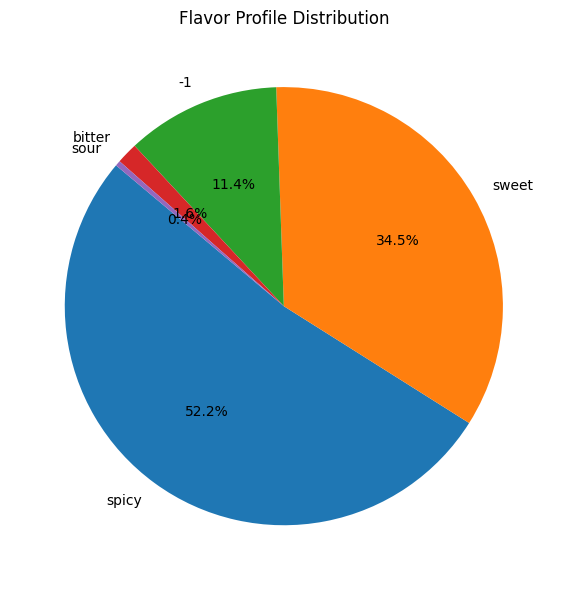

In [10]:
# Pie chart - flavour profile distribution

plt.figure(figsize=(8, 6))
df['flavor_profile'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Flavor Profile Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

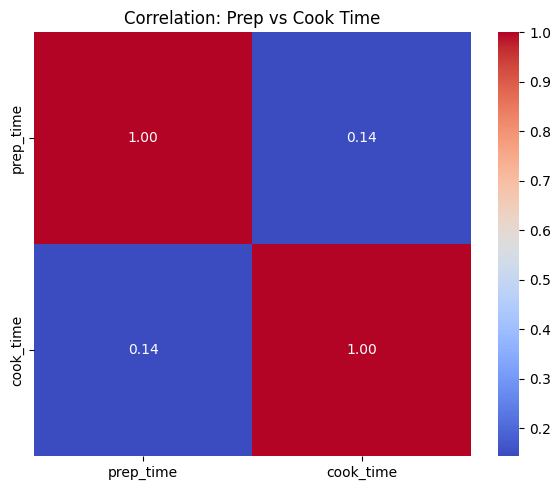

In [11]:
# Heat map - correlation between numeric features

plt.figure(figsize=(6, 5))
sns.heatmap(df[['prep_time', 'cook_time']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Prep vs Cook Time')
plt.tight_layout()
plt.show()